# Problem Set 10

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.linalg import eig
from scipy.stats import beta 

---
## Question 1 (10 + 10 + 10)


There are 100 students in a class. Their final grades are comprised of the following components: 25% problem sets; 25% quizes; 25% final exam; 25% final project.  

|assignment_type|weight_in_grade|
|---|---|
|problem_sets|25%|
|quizzes|25%|
|final_exam|25%|
|final_project|25%|


Students can be either studious or quick. Each student has a studious parameter in $s \in [0, 1]$ and a  quick parameter in $q \in [0, 1]$

- Each student's score on the problem sets is drawn i.i.d. from a binomial distribution with parameters $n=25$ and $p=.8 * s/5$.  

- Each student's score on the final project is drawn i.i.d. from a binomial distribution with parameters $n=25$ and $p=.8 + s/10 + q/10$.

- Each student's score on the quizzes is drawn i.i.d. from a binomial distribution with parameters $n=5$ and $p=4/5+ s/5$ and then multiplied by 5.  

- Each student's score on the final exam is drawn i.i.d. from a binomial distribution with parameters $n=25$ and $p=3/5 + q/5 + s/5$.

A students final score is the sum of their score on each element.  

There are 100 students each with their parameters $q$ and $s$ are each drawn independently from a beta distribution with parameters alpha = 8 and beta = 2.



i.  First, predict the following (without running any code)：
 - What will the Pearson correlations be between four scores (e.g. quiz score; the problem set score, etc.)  Do you think they will be the same or different?  Why?  (The important part here he to answer this before running code.

  - What will the Pearson correlations be between the students' final score and each element of the grade?  (There are 4 predictions to make here: the correlation between the final grade and the quiz score; the correlation between the final grade and the problem set score, etc.)  Do you think they will be the same or different?  Why?  (The important part here he to answer this before running code.

ii.  Run code to simulate the above situation with 100 students.  How correct were your prediction?  



I predict:
- the pearson correlations will be:
I think they will be , because

- The pearson correlations will be
I think they will be , because 

In [3]:
def final_grades(s,q):
	'''
	Calculate final grades, based on the grade breakdown described above 

	Parameters
	----------
	s: float
		studiousness
	q: float
		quickness

	'''
	problemSet = np.random.binomial(25,(0.8*s)/5)
	quizzes = 5 * np.random.binomial(5,(4/5)+(s/5))
	finalExam = np.random.binomial(25,(3/5)+(q/5)+(s/5))
	finalProj = np.random.binomial(25, 0.8+(s/10)+(q/10))
	return [problemSet, quizzes, finalExam, finalProj]

def final(grades):
	final = 0.0
	for grade in grades:
		final += (0.25*grade)
	return final

def corr_btw(students, method='pearson', alpha=8, beta=2):	
	#asked chatgpt how to draw parameters from a beta distribution randomly
	np.random.seed(42)
	sParam = np.random.beta(alpha,beta,size=students)
	qParam = np.random.beta(alpha,beta,size=students)
	params = zip(sParam, qParam)

	#calc grades using the generates s and q parameters
	grades_li = [final_grades(s,q) for s,q in params]

	scores = pd.DataFrame({
	'Problem Sets': [grades[0] for grades in grades_li],
	'Quizzes': [grades[1] for grades in grades_li],
	'Final Exam': [grades[2] for grades in grades_li],
	'Final Project': [grades[3] for grades in grades_li]
	})

	#used https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
	score_corrs = scores.corr(method=method)
	return score_corrs

def corr_final(students, method='pearson', alpha=8, beta=2):
	#asked chatgpt how to draw parameters from a beta distribution randomly
	np.random.seed(42)
	sParam = np.random.beta(alpha,beta,size=students)
	qParam = np.random.beta(alpha,beta,size=students)
	params = zip(sParam, qParam)

	#calc grades using the generates s and q parameters
	grades_li = [final_grades(s,q) for s,q in params]
	finals = [final(grades) for grades in grades_li]

	scores = pd.DataFrame({
	'Problem Sets': [grades[0] for grades in grades_li],
	'Quizzes': [grades[1] for grades in grades_li],
	'Final Exam': [grades[2] for grades in grades_li],
	'Final Project': [grades[3] for grades in grades_li]
	})

	#asked chatgpt how to find correlation between dataframe and series, suggested.corrwith(), and then also
	#used https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html
	final_corrs = scores.corrwith(pd.Series(finals), method=method)
	return final_corrs

print(f"Pearson Correlation btw scores:\n\n{corr_btw(100)}\n\nPearson Correlation btw scores and final grade:\n\n{corr_final(100)}")

Pearson Correlation btw scores:

               Problem Sets   Quizzes  Final Exam  Final Project
Problem Sets       1.000000 -0.076466    0.030495       0.113045
Quizzes           -0.076466  1.000000    0.088019       0.335777
Final Exam         0.030495  0.088019    1.000000       0.259511
Final Project      0.113045  0.335777    0.259511       1.000000

Pearson Correlation btw scores and final grade:

Problem Sets     0.432584
Quizzes          0.649777
Final Exam       0.600619
Final Project    0.635574
dtype: float64


* Do the following 1000 times:
  - Simulate the students' score and calculate the correlation between the students' final score and each component.

  - Was your prediction correct?  Come up with an intuitive explaination for the results.  

In [4]:
scores_corr_with_final = corr_final(1000)
print(f"Correlation btw final score and each component:\n\n{scores_corr_with_final}")

Correlation btw final score and each component:

Problem Sets     0.565589
Quizzes          0.676973
Final Exam       0.507370
Final Project    0.410890
dtype: float64


********* was i correct? my intuitive explanation


* Now consider the matrix $A$ where each row is a student and each column is the score on one of the components.  
i. (Before running code)  Why might you predict that the first two singular values the SVD decomposition are much larger than the next two?  

ii.  Now run the SDV decomposition.  Try to figure out what the first two left singular vectors (with 100 values) are encoding in two ways.  First, try to analyze the left singular values (with 4 entrys).  Second by use linear regression.   First, use the singular values as inputs and try to predcit $q$.  What do you notice?  Second use the singular values as inputs and try to predcit $s$.  What do you notices?



The first two singular values being much larger than the next two indicates that they capture more of the variability than the next two singular values. This would indicate that the problem sets and quizzes are responsible for more of the variability than the final project and the final exam. Logically, this is because the problem sets and quizzes are made up of many separate assignments, for the same percentage as the singular project and the exam, and this means that scores can vary more because they are composite of multiple other scores. 

In [9]:
np.random.seed(42)
sParam = beta.rvs(a=8,b=2,size=100)
qParam = beta.rvs(a=8,b=2,size=100)
params = zip(sParam, qParam)

grades = [final_grades(s,q) for s,q in params]
A = np.array(grades)

#asked chatgpt and used https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html to do svd
U, S, Vt = np.linalg.svd(A, full_matrices=False)

#first two vectors 
vectors = U[:,:2]

#analyze with the singular values as inputs
print(f"Singular values, first 4 entries:\n\n{S[:4]}")

#pred q
q = LinearRegression().fit(vectors, qParam.reshape(-1,1))
predq = q.predict(vectors)

#preds
s = LinearRegression().fit(vectors, sParam.reshape(-1,1))
preds = s.predict(vectors)

print(f"\nPredictions for Q:\n\n{predq[:5]}")
print(f"\nPredictions for S:\n\n{preds[:5]}")




Singular values, first 4 entries:

[410.90302551  18.7062638   16.06167139  11.08160772]

Predictions for Q:

[[0.83734912]
 [0.78907187]
 [0.81324432]
 [0.79522274]
 [0.78313652]]

Predictions for S:

[[0.85506971]
 [0.79367456]
 [0.82428768]
 [0.80187202]
 [0.78656546]]


what do i notice:

iii.

* Now change the model in a non-trivial way.  (For example, make the students have different abilities/study habits/experience.)  
  - In your new model explain how one of the elements above changed.

---

## PageRank (5 + 10)

Assume we have 5 webpages, called A, B, C, D, E, and you want to use PageRank to analyze their importance. For now, we know that each website has the following links.

- A links to B and E.
- B links to C.
- C links to D
- D links to A, B, E
- E links to A, D

After each period, one may stay on the website or click one of the link with equal chance. So if you're at A, then there is 1/3 probability that you'll stay at A for another perior, or goto B or E.

1. What's corresponding transition matrix $M$.  If we use a dampening factor of $0.6$ what is the corresponding transition matrix used in PageRank?

In [26]:
#matrix with probabilities of transitioning to next page,
#rows go ABCDE and columns go ABCDE 
M = np.array([
	[0,0.5,0,0,0.5],
	[0,0,1,0,0],
	[0,0,0,1,0],
	[0.33, 0.33, 0,0,0.33],
	[0.5,0,0,0.5,0]
])

dampening = 0.6

#asked chatgpt how to make the transition matrix used in PageRank
N = M.shape[0]

M_PR = (1-dampening) * (1/N) + dampening * M

print(f"Original Matrix:\n\n{M}\n\nPageRank transition matrix:\n\n{M_PR}")

Original Matrix:

[[0.   0.5  0.   0.   0.5 ]
 [0.   0.   1.   0.   0.  ]
 [0.   0.   0.   1.   0.  ]
 [0.33 0.33 0.   0.   0.33]
 [0.5  0.   0.   0.5  0.  ]]

PageRank transition matrix:

[[0.08  0.38  0.08  0.08  0.38 ]
 [0.08  0.08  0.68  0.08  0.08 ]
 [0.08  0.08  0.08  0.68  0.08 ]
 [0.278 0.278 0.08  0.08  0.278]
 [0.38  0.08  0.08  0.38  0.08 ]]


2. What's the Page Rank of each website? Briefly explain why we can use eigenvector/eigenvalue to find the Page Rank.


In [39]:
eigenvalues, eigenvectors = np.linalg.eig(M_PR.T)
idx = np.argmax(eigenvalues.real)

pagerank = np.abs(eigenvectors[:,idx])
pagerank /= np.sum(pagerank)

for i, page in enumerate(['A','B','C','D','E']):
    print(f"PageRank of {page}: {pagerank[i]}")



PageRank of A: 0.18571817275824934
PageRank of B: 0.18571817275824917
PageRank of C: 0.19171977824004488
PageRank of D: 0.2511257034852074
PageRank of E: 0.18571817275824914


we can use eigen vectors and eigenvalues to find the Page Rank because the page rank represents the relative importance of the webpage in the network of webpages based on how often they're visited. The eigenvector of a page gives the probability of being on the page (aka the pagerank score), and you can determine this number by determining the eigenvector that corresponds to the largest eigenvalue of the transition matrix. 

---

## Network clustering (5 + 5 + 5 + 5)

1.  Write a function to create an adjacency matrix $M$ of an undirected graph made of $n=10$ vertices from two clusters of the same size. Assume the first $n/2$ vertices are in cluster $A$ and the rest vertices are in cluster $B$. Given two points $i$ and $j$, if they're from the same cluster, then there will be a probability of $p$ that there will be an edge from $i$ to $j$ so $M_{ij}=1$, and if they're from different clusters, then the probability is $1−p$. Note $M_{ii}$ should always be $1$.

In [11]:
def build_matrix(n: int, p: float) -> np.array:
  """Build the adjancy matrix

  Args:
    n (int): The number of vertices, should be even
    p (float): The probability that an edge will be generated from one point to another within a cluster
  """
  #asked chat gpt for help, gave it the question and function definition, then went through and commented/ made sure I understood code
  #initialize matrix with 0
  M = np.zeros((n,n), dtype=int)
  #iterate rows
  for i in range(n):
    #iterates over columns, avoids 2nd half of matrix (symmetric, would be redundant)
    for j in range(i+1, n):
      #makes sure in the same cluster (< n/2 is cluster A, else cluster B)
      if (i < n//2 and j < n//2) or (i >= n//2 and j >= n//2):
        #uses prob p to determine if its edge or not
        M[i,j] = 1 if np.random.random() < p else 0
      else:
        #uses prob p-1 to determine if its an edge or not 
        M[i,j] = 1 if np.random.random() < (1-p) else 0
      #symmetric matrix, fills in second half of matrix we aren't iterating over
      M[j,i] = M[i,j]
  #fill diag, because its 1 on diag bc its connected to itself
  np.fill_diagonal(M,1)
  return M



matrix = build_matrix(n=10, p=0.9)
matrix

array([[1, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 1, 1],
       [0, 0, 1, 0, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

2. Use spectral clustering to label the clusters when $n=10$ and $p=0.75$. To implement spectral clustering, you should first find out the eigen vector $v$ corresponding to the second largest real eigen value for your adjacency matrix $M$. Based on your eigen vector, if its i-th elements is larger than the median, then it belongs to one cluster, and vice versa. Give us your labels

In [12]:
def spectral_clust(adj_matrix):
	'''
	Spectral clustering to label the clusters

	Parameters
	----------
	adj_matrix: np.array
		matrix to be labeled

	'''
	#find eigenvectors and eigenvalues
	eigenvalues, eigenvectors = eig(adj_matrix)
	#idx of second largest real eigenvalue
	secondidx = np.argsort(eigenvalues.real)[-2]
	#eigenvector corresponding to second largest real eigenvalue
	secondeigenvector = eigenvectors[:, secondidx]
	#find median of eigenvector
	median = np.median(secondeigenvector)
	#label with 1 where element is larger than median, else 0
	labels = np.where(secondeigenvector > median, 1,0)
	return labels

matrix = build_matrix(n=10, p=0.75)
labels = spectral_clust(matrix)
print(f"Cluster labels:\n{labels}")


Cluster labels:
[1 1 1 1 1 0 0 0 0 0]


3. Implement a function to calculate the Jaccard Similarity between the ground truth and your predictions. There are two clusters from the ground truth, and two clusters from your predictions, but you just need to give us the largest Jaccard Similarity from these 4 pairs. Run the function on your previous predicitons

In [54]:
def jaccard_sim(labels,pred_labels):
	'''
	calculate jaccard similarity between ground truth and predictions

	Parameters
	----------
	labels: 
	'''
	max_sim = 0.0
	#iterates over 0 and 1
	for i in range(2):
		#also iterates over 0 and 1
		for j in range(2):
			intersect = len(np.intersect1d(np.where(labels == 1)[0], np.where(pred_labels == j)[0]))
			union = len(np.union1d(np.where(labels == i)[0], np.where(pred_labels == j)[0]))
			jaccard = intersect/union if union != 0 else 0.0
			max_sim = max(max_sim, jaccard)
	return max_sim

#run function on previous predictions

4. Calculate the Jaccard Similarity when $n=100$, $p$ in $[0.5, 0.51, 0.53, 0.55, 0.6, 0.65, 0.7, 0.75, 0.9, 1]$ through spectral clustering.

In [55]:
n= 100
ps = [0.5, 0.51, 0.53, 0.55, 0.6, 0.65, 0.7, 0.75, 0.9, 1]

jsim_res = {}

for p in ps:
	matrix = build_matrix(n,p)
	pred_labels = spectral_clust(matrix)
	labels = np.concatenate((np.zeros(n//2), np.ones(n//2))).astype(int)
	j_sim = jaccard_sim(labels, pred_labels)
	jsim_res[p] = j_sim

for p, score in jsim_res.items():
	print(f"Jaccard Sim Score for p={p}: {score}\n\n")


Jaccard Sim Score for p=0.5: 0.35135135135135137


Jaccard Sim Score for p=0.51: 0.3888888888888889


Jaccard Sim Score for p=0.53: 0.42857142857142855


Jaccard Sim Score for p=0.55: 0.7543859649122807


Jaccard Sim Score for p=0.6: 0.8518518518518519


Jaccard Sim Score for p=0.65: 1.0


Jaccard Sim Score for p=0.7: 1.0


Jaccard Sim Score for p=0.75: 1.0


Jaccard Sim Score for p=0.9: 1.0


Jaccard Sim Score for p=1: 1.0




---

## Linear Regression (5 + 5 + 5)

(1) You are given as inputs the length, width, and height of cardboard boxes full with textbooks and are trying to predict the weight of the box.

Do you expect linear regression with the input features to work well? Why? If not, how to make linear regression work in this case.

(2) Shengwei notice that the length and width are in inches while the height is in centimeters, do you think this will influence the result of linear regression?

1. I don't think that linear regression will work well in this case, as the inputs to the model will not help a lot to predict weight. The weight of the box does not only depend on the volume (which we can easily predict from these inputs) but also the material of the box, the density, the thickness, etc. So we would need more information like this to predict the weight of the box well. 

2. Yes this will influence the linear regression. Having inputs in different scales will be confusing for the model/ it will assume that all the features are in the same scale so it will inaccurately represent the height in relation to the length and width. The difference in units will make the inputs be inaccurately handled, and will lead the output of the model to be inaccurate. 

(3) Now run a simple linear regression on the data, and investigate its performance. Note that this question has multiple parts.

First you need to run the following block, which sets up the datasets to be used for this question.


In [28]:
import numpy as np

# We fix the state of the random number generator here in order to maintain consistency in the results
rs = np.random.RandomState(0)
X = rs.uniform(size = (100, 1))
y = 5 * X + rs.normal(size = (100, 1)) + 2

Now, write a function that takes in training data as input, and fits a line to the data using a linear regression model. Your function should return the linear regression model.

In [31]:
def fit_line(X_train, y_train):
    from sklearn.linear_model import LinearRegression

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    # Return the linear regression model you created
    return linreg

Run the following block of code in order to (1) compute the the $R^2$ (coefficient of determination) regression score on the dataset, and then (2) plot the dataset and the regression line in the figure.

R2 score: 0.6711924461927896


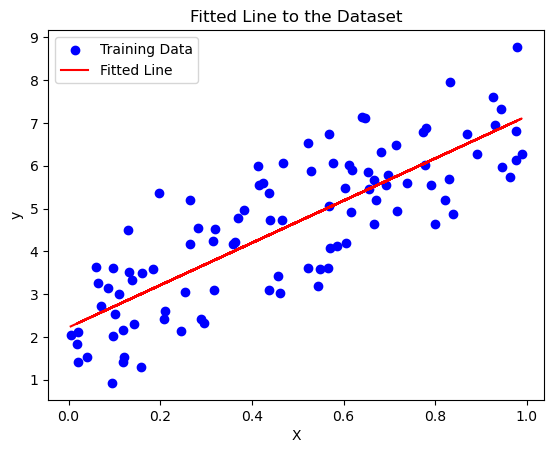

In [34]:
# Fit a line to the dataset we generated at the beginning of this problem using your function
linreg = fit_line(X,y)
y_pred = linreg.predict(X)

# Compute R^2 score of your model on dataset
r2 = r2_score(y,y_pred)
print(f"R2 score: {r2}")

# Plot the training and test datasets in the same figure marked by different colors
plt.scatter(X, y, color='blue', label='Training Data')
plt.plot(X, y_pred, color='red', label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Fitted Line to the Dataset')
plt.legend()
plt.show()

---

## Logistic Regression and Bayesian Theorem (20)

In this question, we will go step by step to get logistic regression with Bayesian Theorem.

$Y$ is 0-1 random variable, following a Bernoulli distribution, with parameter $p=P(Y=1)$

$X=(X_1 ... X_n)$,where each $X_i$ is a continuous random variable in $\mathbb{R}$

Our goal is to compute $P(Y=1|X)$

**For better understanding, we give the answers to the first 6 questions, but you are still required to understand the answers clearly, and then finish last 2 questions.**

**Question 1**

Applying Bayes rule and law of total probability, use $P(X|Y=1),P(X|Y=0),P(Y=1),P(Y=0)$ to represent $P(Y=1|X)$

**Answer 1**

$P(Y=1 \mid X)=\frac{P(Y=1) P(X \mid Y=1)}{P(Y=1) P(X \mid Y=1)+P(Y=0) P(X \mid Y=0)}$

**Question 2**

You may find there are two same items on both denominator and numerator. Divide both denominator and numerator by it.

**Answer 2**

$P(Y=1 \mid X)=\frac{1}{1+\frac{P(Y=0) P(X \mid Y=0)}{P(Y=1) P(X \mid Y=1)}}$

**Question 3**

We now foucs on the $\frac{P(Y=0) P(X \mid Y=0)}{P(Y=1) P(X \mid Y=1)}$.

We make the first key assumption.

> For all $i$ and $j\neq i$, $X_i$ and $X_j$ are conditionally independent given $Y$, which means $P(X_i,X_j|Y) = P(X_i|Y)P(X_j|Y)$

Please show why $\frac{P(Y=0) P(X \mid Y=0)}{P(Y=1) P(X \mid Y=1)} = \exp \left(\ln \frac{1-p}{p}+\sum_i \ln \frac{P\left(X_i \mid Y=0\right)}{P\left(X_i \mid Y=1\right)}\right)$


**Answer 3**

Take log to make multiplication summation

**Question 4**

We now focus on each $\ln\frac{P\left(X_i \mid Y=0\right)}{P\left(X_i \mid Y=1\right)}$.

We make the second key assumption:


> For each $X_i$, $P(X_i|Y=0)$ follows a normal distribution $N(\mu_{i0},\sigma_i)$ and $P(X_i|Y=1)$ follows a normal distribution $N(\mu_{i1},\sigma_i)$

Substitute $P\left(X_i \mid Y=0\right)$ and $P\left(X_i \mid Y=1\right)$ with the pdf of normal distribution, and simplify $\ln\frac{P\left(X_i \mid Y=0\right)}{P\left(X_i \mid Y=1\right)}$.






**Answer 4**

$\begin{aligned} \ln \frac{P\left(X_i \mid Y=0\right)}{P\left(X_i \mid Y=1\right)} & = \ln \frac{\frac{1}{\sqrt{2 \pi \sigma_i^2}} \exp \left(\frac{-\left(X_i-\mu_{i 0}\right)^2}{2 \sigma_i^2}\right)}{\frac{1}{\sqrt{2 \pi \sigma_i^2}} \exp \left(\frac{-\left(X_i-\mu_{i 1}\right)^2}{2 \sigma_i^2}\right)} \\ & = \ln \exp \left(\frac{\left(X_i-\mu_{i 1}\right)^2-\left(X_i-\mu_{i 0}\right)^2}{2 \sigma_i^2}\right) \\
& =\frac{\left(X_i-\mu_{i 1}\right)^2-\left(X_i-\mu_{i 0}\right)^2}{2 \sigma_i^2}\\
& =\frac{\left(X_i^2-2 X_i \mu_{i 1}+\mu_{i 1}^2\right)-\left(X_i^2-2 X_i \mu_{i 0}+\mu_{i 0}^2\right)}{2 \sigma_i^2} \\
& =\frac{2 X_i\left(\mu_{i 0}-\mu_{i 1}\right)+\mu_{i 1}^2-\mu_{i 0}^2}{2 \sigma_i^2} \\
& =\frac{\mu_{i 0}-\mu_{i 1}}{\sigma_i^2} X_i+\frac{\mu_{i 1}^2-\mu_{i 0}^2}{2 \sigma_i^2}\end{aligned}$


**Question 5**

This step could be hard, so I will give you the correct answer to check.

$\ln\frac{P\left(X_i \mid Y=0\right)}{P\left(X_i \mid Y=1\right)} = \frac{\mu_{i 0}-\mu_{i 1}}{\sigma_i^2} X_i+\frac{\mu_{i 1}^2-\mu_{i 0}^2}{2 \sigma_i^2}$

Then put everything together, see what can $P(Y=1 \mid X)=\frac{1}{1+\frac{P(Y=0) P(X \mid Y=0)}{P(Y=1) P(X \mid Y=1)}}$ be simplified now.

**Answer 5**

$P(Y=1 \mid X)=\frac{1}{1+\exp \left(\ln \frac{1-p}{p}+\sum_i\left(\frac{\mu_{i 0}-\mu_{i 1}}{\sigma_i^2} X_i+\frac{\mu_{i 1}^2-\mu_{i 0}^2}{2 \sigma_i^2}\right)\right)}$

**Question 6**

Recall that in logistic regress, we have

$P(Y=1 \mid X)=\frac{1}{1+\exp \left(w_0+\sum_{i=1}^n w_i X_i\right)}$

Can you find what $w_0$ and $w_i$ are, in terms of $\mu_{i0},\mu_{i1},\sigma_i$ and $p$?


**Answer 6**

$\begin{gathered}w_i=\frac{\mu_{i 0}-\mu_{i 1}}{\sigma_i^2} \\ w_0=\ln \frac{1-p}{p}+\sum_i \frac{\mu_{i 1}^2-\mu_{i 0}^2}{2 \sigma_i^2}\end{gathered}$

**Question 7**

Given this process, in which case you think the logistic regression will work well, and in which case it won't.

**Question 8**

Let's verify our findings with some synthetic data. We provide a data generator as following. Note that the size of each class is the same, implying $p=0.5$.

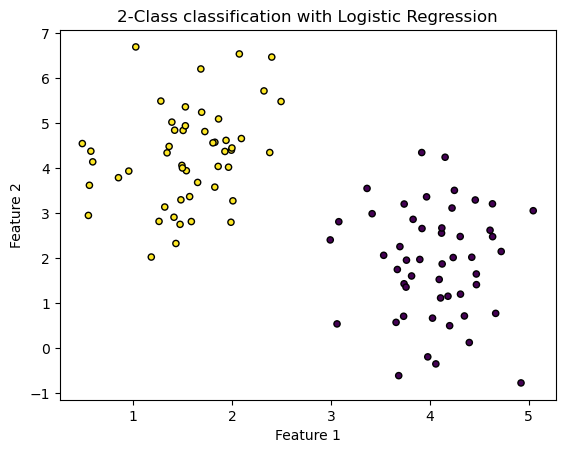

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

# DO NOT MODIFY: Generate a synthetic binary classification dataset with 2 features
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_clusters_per_class=1, flip_y=0, random_state=8)
X[y==1] = X[y==1]*1.4
X = X + 3

scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.title("2-Class classification with Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Find the expectation and variance values for the two features, broken down by the two classes in the dataset.

Specifically, you need to find $E[X_i|Y=0]$ and $E[X_i|Y=0]$ for each $i$. Note that the empirical variance for different classes may be different, use the mean variance instead.

In [36]:
# Your answer here
#expectations
exp0 = np.mean(X[y==0], axis=0)
exp1 = np.mean(X[y==1], axis=0)

#mean variances 
var0 = np.mean(np.var(X[y==0], axis=0))
var1 = np.mean(np.var(X[y==1], axis=0))

print(f"Expectation for class 0: {exp0}\n\nExpectation for class 1: {exp1}\n\nMean variance class 0: {var0}\n\nMean variance class 1: {var1}")

Expectation for class 0: [4.0509194  1.89744755]

Expectation for class 1: [1.55312576 4.28138001]

Mean variance class 0: 0.8340955994213581

Mean variance class 1: 0.6907421870152737


Can you find the parameters $w_0$, $w_1$, $w_2$ without training the model?

Given the parameters $w_0$, $w_1$, $w_2$, plot the line $P(Y=1|X) = 1/2$ with the data points. Does the line seperate the two classes?

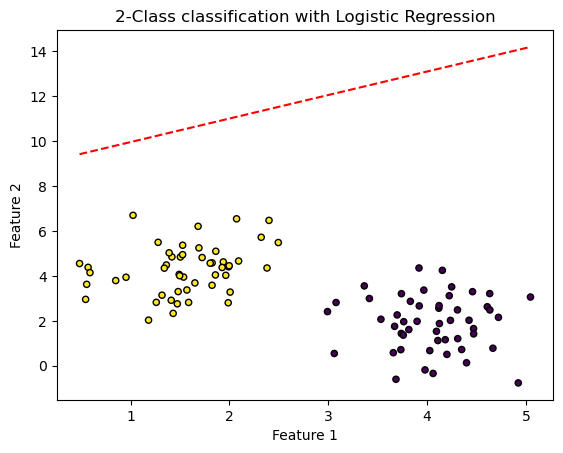

In [38]:
# Your answer here
p = 0.5

w1 = (exp0[0] - exp1[0])/(var0+var1)
w2 = (exp0[1] - exp1[1])/(var0+var1)
w0 = np.log((1-p)/p) + np.sum(((exp1**2)-(exp1**2)/(2*(var0+var1))))

# Plot data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.title("2-Class classification with Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot decision boundary line
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_values = -(w1 * x_values + w0) / w2
plt.plot(x_values, y_values, color='red', linestyle='--')

plt.show()
